# Проект урока 5. Решение продуктовых задач
#  «Анализ данных о транзакциях»

Представьте, что вы — аналитик данных в ритейле. Маркетинговый отдел попросил помочь решить несколько задач: нужно разобраться в поведении пользователей, проанализировать транзакции и выявить аномальный рост или проблемы, если они есть. Этот проект разделен на части, в каждой из них вы будете работать с разными наборами данных.

# Часть 1

## Шаг 1

В файле `5_data.zip` имеются следующие данные о транзакциях:

- InvoiceNo — номер заказа  
- StockCode — код товара  
- Description — описание товара  
- Quantity — количество единиц товара, добавленных в заказ  
- InvoiceDate — дата транзакции   
- UnitPrice — цена за единицу товара  
- CustomerID — id клиента  
- Country — страна, где проживает клиент

Каждая строка — это отдельная транзакция (т.е. добавление одного товара в корзину или его удаление, если это запись об отмененной транзакции). В данных нет кода для каждой транзакции, только для товара и для заказа. В одном заказе может быть несколько транзакций. Разные товары могут быть в разных заказах. Неотмененные транзакции считаются реализованными (т.е. эти товары были куплены).

## Шаг 2

Прочитайте данные с кодировкой `ISO-8859-1`, запишите полученный датафрейм в `retail`. **Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество.** Если они есть, то удалите их из `retail` — дубликаты негативно влияют на точность анализа данных

In [1]:
import pandas as pd

In [5]:
retail = pd.read_csv('5_data.zip', compression='zip', encoding='ISO-8859-1')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
res = retail.loc[retail.duplicated()]
res

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [11]:
res.shape[0]



5268

In [13]:
retail = retail.drop_duplicates()
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Шаг 3

Продолжим предобработку данных перед их анализом. Данные содержат в себе записи как об успешных транзакциях, так и об отмененных. Если пользователь отменил транзакцию, в начале номера заказа (см.колонку `InvoiceNo`) ставится `C` (от `canceled`). **Сколько всего транзакций отменили пользователи?** Удалите эти записи из датафрейма `retail`, дальше они нам не понадобятся

In [30]:
Canceled = retail.InvoiceNo.str.startswith('C')
Canceled

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 536641, dtype: bool

In [34]:
Canceled.astype('int').sum()

9251

In [40]:
retail = retail[~Canceled]
retail

c:\users\elnur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Шаг 4

Ваша задача — проанализировать покупки наиболее активных пользователей одной из стран. **Для этого сначала вам нужно найти пользователей из Германии, которые совершили значительное количество заказов, т.е. выше определенного порога N**. Ваши коллеги уже расчитали, что этот порог — 80-й процентиль. Иными словами, вам нужно посчитать число заказов (см.колонку `InvoiceNo`) для каждого пользователя (см. колонку `CustomerID`) из Германии (Germany) и оставить только тех, кто совершил более N заказов, где N – 80-й процентиль. Запишите полученные id пользователей в переменную `germany_top` (не весь датафрейм, только id).

**На LMS датафрейм сохранен в переменную `retail`. Загрузите в LMS Ваш код, в котором выполняете все эти шаги**

In [57]:
invoice_dist = retail\
    .query('Country == "Germany"')\
    .groupby('CustomerID', as_index=False)\
    .agg({'InvoiceNo':'nunique'})\
    .rename(columns={'InvoiceNo':'total_invoices'})
invoice_dist

,CustomerID,total_invoices
0,12426.0,1
1,12427.0,3
2,12468.0,2
3,12471.0,30
4,12472.0,7
...,...,...
89,13814.0,2
90,13815.0,4
91,13816.0,2
92,13817.0,2


In [58]:
N = invoice_dist.total_invoices.quantile(q=0.8)
N

7.0

In [59]:
germany_top = invoice_dist.query('total_invoices > @N').sort_values('total_invoices', ascending=False).CustomerID
germany_top

37    12569.0
3     12471.0
83    12720.0
52    12621.0
6     12474.0
79    12709.0
81    12712.0
64    12647.0
16    12500.0
8     12476.0
69    12662.0
12    12481.0
44    12600.0
78    12708.0
51    12619.0
56    12626.0
77    12705.0
26    12524.0
Name: CustomerID, dtype: float64

## Шаг 5

Теперь, когда у вас есть нужные id пользователей (в переменной `germany_top` с предыдущего шага), вы можете отобрать все записи о транзакциях этих пользователей, чтобы потом их проанализировать. **Возьмите из датафрейма `retail` записи только по интересующим нас пользователям из переменной `germany_top`. Результирующий датафрейм запишите в `top_retail_germany`.**

**На LMS датафрейм с данными о транзакциях сохранен в переменную `retail`, а нужные id пользователей – в `germany_top`. Загрузите в LMS ваш код, в котором сохраняете в датафрейм `top_retail_germany` только записи о транзакциях нужных пользователей**

In [63]:
top_retail_germany = retail.query('CustomerID in @germany_top')
top_retail_germany

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541726,581570,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,12/9/2011 11:59,4.95,12662.0,Germany
541727,581570,23077,DOUGHNUT LIP GLOSS,20,12/9/2011 11:59,1.25,12662.0,Germany
541728,581570,20750,RED RETROSPOT MINI CASES,2,12/9/2011 11:59,7.95,12662.0,Germany
541729,581570,22505,MEMO BOARD COTTAGE DESIGN,4,12/9/2011 11:59,4.95,12662.0,Germany


## Шаг 6

Наконец можем переходить непосредственно к анализу данных! **Определите, какой товар отобранные нами активные пользователи из Германии (см.датафрейм `top_retail_germany`) добавляли в корзину чаще всего (без учета количества товара).** Не берите в расчет услугу доставки, обозначенную как `POST`.

In [76]:
top_retail_germany.StockCode.value_counts()

POST      213
22326      52
22328      38
22423      34
20719      30
         ... 
23401       1
21928       1
22702       1
23194       1
85061W      1
Name: StockCode, Length: 1158, dtype: int64

## Шаг 7

Вернемся к анализу датафрейма `retail`. **Вам нужно найти 5 наиболее крупных по выручке заказов.**  Для этого сначала посчитайте сумму покупки для каждой транзакции, т.е. создайте колонку `Revenue` с суммой покупки, используя колонки `Quantity` и `UnitPrice`. Потом для каждого заказа (см.колонку `InvoiceNo`) суммируйте выручку всех входящих в него транзакций — это будет колонка `TotalRevenue`. Отсортируйте записи в порядке убывания `TotalRevenue`. **В качестве ответа укажите топ-5 заказов (см.колонку `InvoiceNo`) по сумме заказа (через запятую с пробелом, в том же порядке)**

In [79]:
retail['Revenue'] = retail['Quantity']*retail['UnitPrice']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [96]:
top_revenue = retail\
    .groupby('InvoiceNo', as_index=False)\
    .agg({'Revenue':'sum'})\
    .rename(columns={'Revenue':'TotalRevenue'})\
    .sort_values('TotalRevenue', ascending=False)\
    .head(5)

top_revenue

,InvoiceNo,TotalRevenue
22025,581483,168469.60
2303,541431,77183.60
18776,574941,52940.94
19468,576365,50653.91
9741,556444,38970.00


In [97]:
list(map(int, top_revenue.InvoiceNo.to_list()))

[581483, 541431, 574941, 576365, 556444]

# Часть 2

Работать с прошлыми данными вы закончили. Да, иногда приходится решать разовые задачи (их ещё называют ad-hoc задачами) и не редкость, что этап подготовки данных занимает больше времени, чем сам их анализ.

**Переключаемся на работу с новым датасетом `transaction_data.csv`. Ваш коллега описывает данные следующим образом:**

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)  
- name – имя пользователя  
- transaction – статус транзакции  
- minute – сколько минут прошло с начала дня (эта колонка будет доступна в данных с определенного шага)

Каждая строка — это отдельная транзакция.

## Шаг 8

Как всегда, начнем работу со знакомства с набором данных, проверим их полноту и получим общее представление о структуре данных. Загрузите датасет `transaction_data.csv` и посмотрите на его содержимое. Проверьте размер таблицы, типы данных и описательную статистику. **Определите, сколько в датасете пропущенных значений?**

In [101]:
data = pd.read_csv('transaction_data.csv')

In [102]:
data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [105]:
data.dtypes

date           object
name           object
transaction    object
dtype: object

In [108]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [112]:
data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

## Шаг 9

Ваша задача — проанализировать транзакции пользователей с точки зрения статуса транзакций. **Для начала определите количество транзакций того или иного статуса и визуально представьте эту информацию с помощью графика барплот.** Подумайте, является ли проблемой количество транзакций со статусом `error` (ошибка)?

Расположите статусы в порядке убывания числа относящихся к ним записям (от большего к меньшему):  
1. cancelled  
2. error  
3. successfull

In [116]:
transaction_counts = data.transaction.value_counts()
transaction_counts

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [115]:
import seaborn as sns

<AxesSubplot:xlabel='transaction', ylabel='count'>

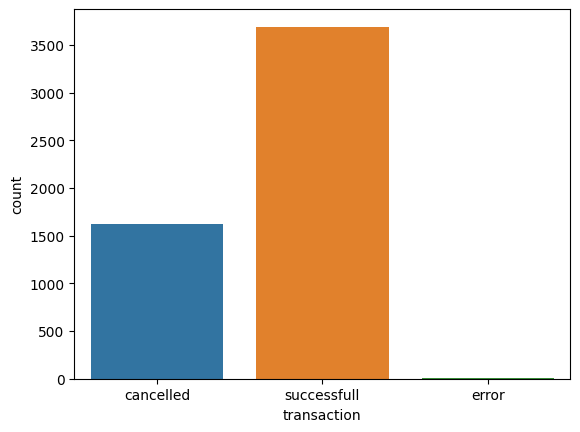

In [121]:
sns.countplot(data=data, x='transaction')

<AxesSubplot:xlabel='transaction'>

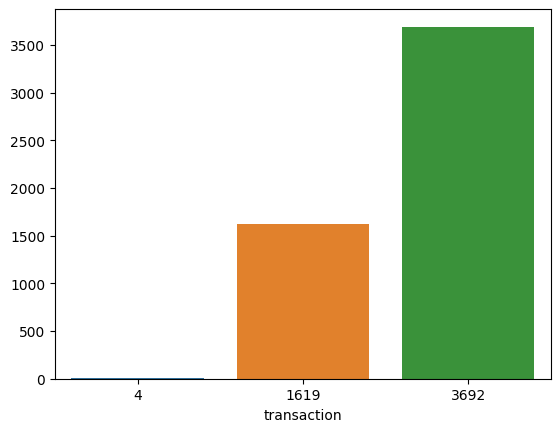

In [122]:
sns.barplot(data=transaction_counts, x=transaction_counts.index, y=transaction_counts.values)

## Шаг 10

**А теперь посчитайте, сколько успешных транзакций совершил каждый пользователь.**

**Выберите одно или несколько верных утверждений:**  
- Пользователи в среднем совершили примерно по 66 транзакций  
- Максимальное число транзакций – 82  
- Пользователи в среднем совершили по 64 транзакции  
- Примерно 25% пользователей совершили менее 61 транзакции  
- Примерно 25% пользователей совершили более 61 транзакции  
- Пользователи в среднем совершили примерно по 56 транзакций  
- Максимальное число транзакций – 112  
- Пользователи в среднем совершили примерно по 94 транзакции

In [132]:
res = data.query('transaction == "successfull"')
res

,date,name,transaction
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
6,2020-03-02 00:54:12,Olga_Lesnova,successfull
7,2020-03-02 00:18:43,Irina_Lesnova,successfull
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull
...,...,...,...
5309,2020-03-02 01:26:13,Olga_Ozerova,successfull
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull


In [133]:
res = res.name.value_counts()
res

Svetlana_Smirnova      82
Masha_Ozerova          80
Olga_Smirnova          80
Svetlana_Ivanova       79
Masha_Polyanova        78
Svetlana_Polyanova     78
Ekaterina_Smirnova     77
Irina_Ozerova          76
Irina_Lesnova          76
Lolita_Ivanova         76
Julia_Petrova          74
Masha_Ivanova          73
Olga_Fedorova          72
Ekaterina_Ozerova      72
Ekaterina_Fedorova     72
Lolita_Fedorova        70
Olga_Polyanova         70
Masha_Fedorova         69
Ekaterina_Petrova      68
Ekaterina_Polyanova    68
Svetlana_Fedorova      67
Julia_Fedorova         67
Olga_Petrova           67
Julia_Smirnova         67
Irina_Petrova          66
Lolita_Smirnova        65
Olga_Ozerova           65
Olga_Ivanova           64
Vasilisa_Smirnova      64
Lolita_Petrova         64
Irina_Smirnova         63
Ekaterina_Lesnova      63
Julia_Ivanova          63
Lolita_Ozerova         63
Masha_Lesnova          63
Vasilisa_Petrova       63
Vasilisa_Ozerova       62
Vasilisa_Ivanova       62
Masha_Petrov

In [134]:
res.describe()



count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: name, dtype: float64

## Шаг 11

**На основе расчетов с прошлого шага постройте гистограмму, на которой по оси `x` будет отложено число транзакций, а по оси `y` — количество пользователей с таким числом транзакций.**

**Выберите одно или несколько верных утверждений:**  
- Ни один пользователь не совершил 45 транзакций  
- Пользователей, совершивших от 45 до 55 транзакций, меньше, чем пользователей, совершивших от 70 до 80 транзакций  
- Пользователей, совершивших от 45 до 55 транзакций, больше, чем пользователей, совершивших от 70 до 80 транзакций  
- Распределение явно скошено влево (пик слева и низкие значения в центре и справа)
- Распределение имеет пик по центру и снижающиеся значения по бокам

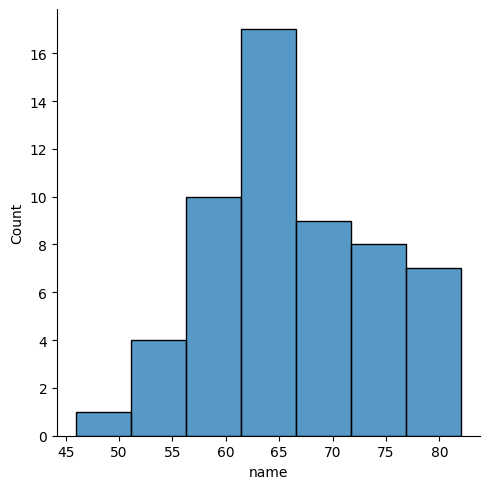

In [136]:
sns.displot(res)



## Шаг 12

**К вам пришёл коллега из маркетингового отдела с немного обновленными данными — см.датасет `transaction_data_updated.csv`.** Он попросил сформировать сводную таблицу, которая покажет, какое количество операций осуществлял каждый пользователь в каждую минуту наблюдаемого временного промежутка. Эта информация нужна вашему коллеге для того, чтобы оценить, не было ли аномального скачка в количестве операций — как раз в то время рекламу вашей компании опубликовал известный блогер, ваш коллега хочет отследить, была ли быстрая реакция на неё.

**Постройте сводную таблицу `pivot_trans_per_min`,** где:

- столбцы – имена пользователей  
- строки – минута времени осуществления операции (см.колонку `minute`)  
- значения – число совершённых операций

Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно — постройте табличку по всем.

**На LMS датафрейм сохранен в переменную `df`. Загрузите в LMS Ваш код, в котором создаете сводную таблицу `pivot_trans_per_min` и заполняете пропуски нулями**

In [145]:
df = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [146]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [147]:
df


,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [157]:
res = df\
    .groupby(['name', 'minute'], as_index=False)\
    .agg({'transaction':'count'})

res

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [158]:
res = res.pivot(values='transaction', index='minute', columns='name')
res


name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,3.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,NaN,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [162]:
pivot_trans_per_min = res.fillna(0)
res

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


## Шаг 13

Получив сводную таблицу, ваш коллега построил по ней график, где по оси `x` – минута транзакции (сколько минут прошло с начала дня), а по оси `y` – число транзакций. Но коллега сомневается, что в данных нет ошибки

![](https://ucarecdn.com/76242146-2d40-40d8-9a4d-2069d97da56f/-/crop/746x502/52,40/-/preview/)

**Определите, из-за чего мы видим такую картину. Произошла ошибка или с данными всё хорошо? Выберите один вариант:**

- Всё хорошо!  
- Вместо минут извлекли дни, а не сколько минут прошло с начала дня  
- Извлекли минутную часть времени, а не число минут с начала дня  
- В столбец minute записали число транзакций, совершенных пользователем

In [164]:
res = pivot_trans_per_min.sum(axis=1)



<AxesSubplot:xlabel='minute'>

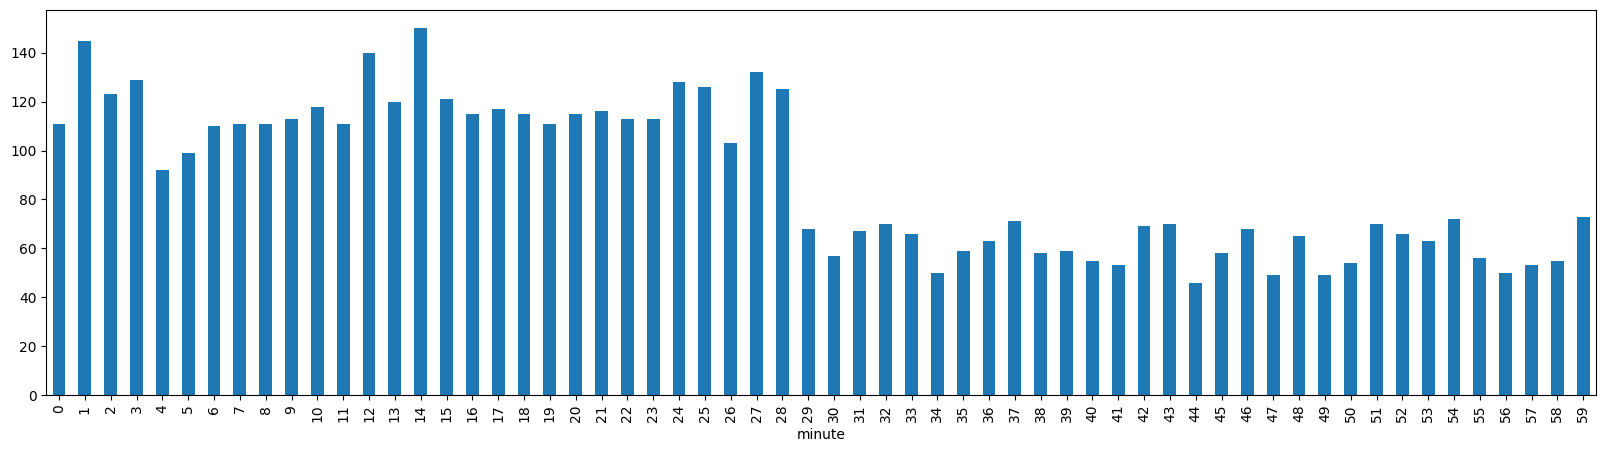

In [169]:
res.plot.bar(figsize=(20,5))


## Шаг 14

Что ж, ошибку в работе с данными совершить легко. **Исправьте её и подсчитайте правильное количество минут, прошедших с начала дня, сохранив результаты в новой колонке `true_minute`.**

Постройте график и посмотрите, произошли ли изменения. Из-за того, что теперь вариантов минут больше, используйте другой тип графика — гистограмму распределения (см.функцию `sns.displot`).

**На LMS датафрейм сохранен в переменную `df`, колонка `date` прочитана как дата. Загрузите в LMS Ваш код, в котором создаете колонку `true_minute`. Код с построением графика копировать в LMS не нужно**

In [183]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour*60

<AxesSubplot:xlabel='true_minute', ylabel='count'>

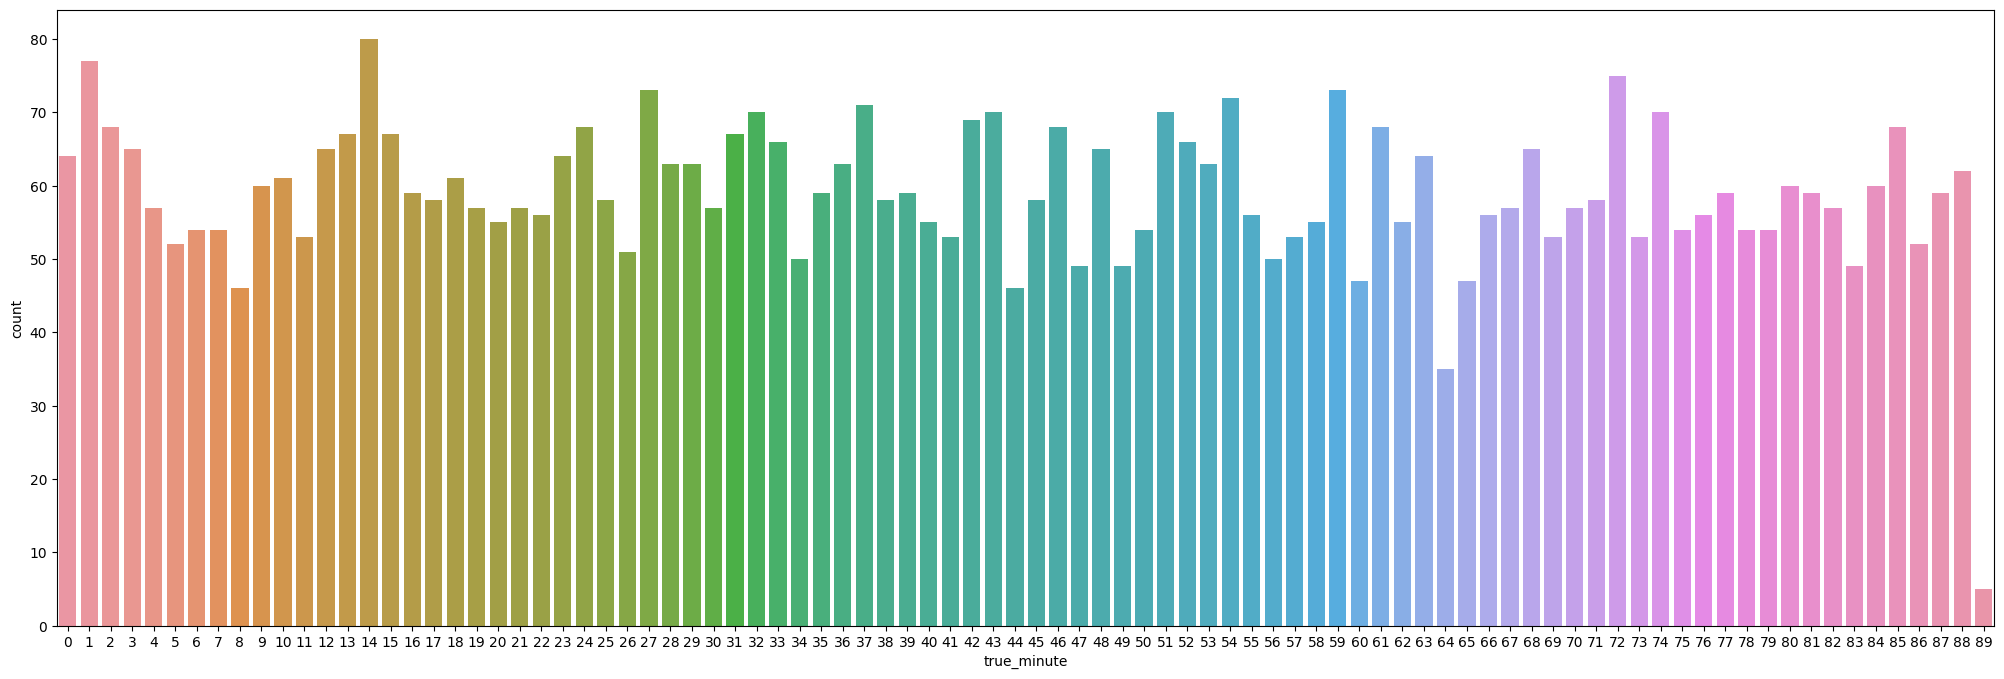

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 8))

sns.countplot(data=df, x='true_minute')



## Итоги

В этом уроке вы проанализировали несколько наборов данных о транзакциях и научились подготавливать данные к анализу, удалять дубликаты и другие лишние данные, определять, какие данные нужно оставить, а в каких есть ошибка, заполнять пропуски, строить сводные таблицы и корректные графики.